In [83]:
import pandas as pd

df = pd.read_csv("shoe_sales.csv")
df.head(5)

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [84]:
df_nike = df[df.brand == "Nike"]
print(df_nike.head(5))
df_adidas = df[df.brand == "Adidas"]
print(df_adidas.head(5))

       date brand  sold_qty
0  9/1/2023  Nike      24.0
2  9/2/2023  Nike      21.0
4  9/3/2023  Nike      18.0
6  9/4/2023  Nike      22.0
8  9/5/2023  Nike      20.0
       date   brand  sold_qty
1  9/1/2023  Adidas      14.0
3  9/2/2023  Adidas      12.0
5  9/3/2023  Adidas      11.0
7  9/4/2023  Adidas      13.0
9  9/5/2023  Adidas      10.0


In [85]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [86]:
def plot_qty():
    plt.figure(figsize=(15, 6))
    
    dates = df_nike['date']
    
    plt.plot(dates, df_nike['sold_qty'], marker='o', label='Nike', color='blue')
    plt.plot(dates, df_adidas['sold_qty'], marker='o', label='Adidas', color='red')
    
    plt.xlabel('Date')
    plt.ylabel('Total Qty Sold')
    plt.title('Daily Sales Qty for Nike and Adidas in September 2023')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

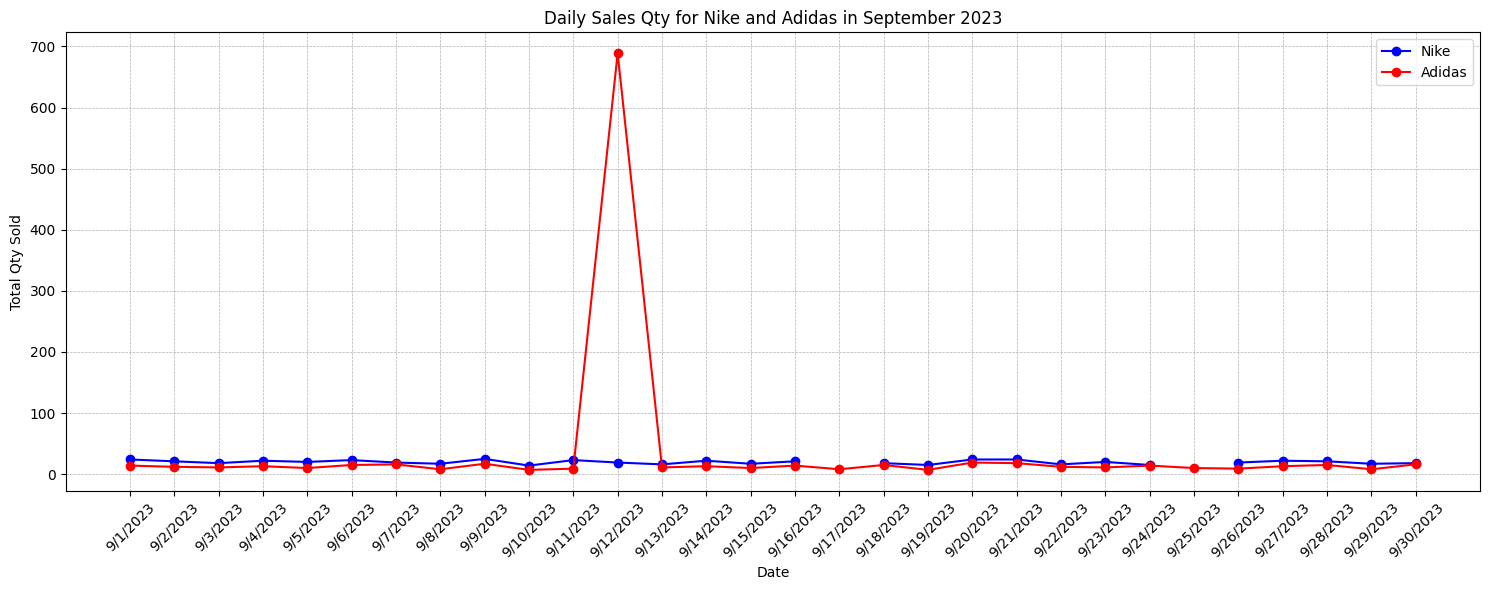

In [87]:
plot_qty()

In [88]:
df_nike.sold_qty.describe()

count    28.000000
mean     19.642857
std       3.117624
min      14.000000
25%      17.000000
50%      19.500000
75%      22.000000
max      25.000000
Name: sold_qty, dtype: float64

In [89]:
df_nike.isnull()

,date,brand,sold_qty
0,False,False,False
2,False,False,False
4,False,False,False
6,False,False,False
8,False,False,False
10,False,False,False
12,False,False,False
14,False,False,False
16,False,False,False
18,False,False,False


In [90]:
df_nike.isnull().sum()

date        0
brand       0
sold_qty    2
dtype: int64

In [91]:
df_nike.sold_qty.isnull()

0     False
2     False
4     False
6     False
8     False
10    False
12    False
14    False
16    False
18    False
20    False
22    False
24    False
26    False
28    False
30    False
32     True
34    False
36    False
38    False
40    False
42    False
44    False
46    False
48     True
50    False
52    False
54    False
56    False
58    False
Name: sold_qty, dtype: bool

In [92]:
df_nike.sold_qty.fillna(df_nike.sold_qty.mean(), inplace=True)

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_4444\3631849157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nike.sold_qty.fillna(df_nike.sold_qty.mean(), inplace=True)
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_4444\3631849157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.sold_qty.fillna(df_nike.sold_qty.m

In [93]:
df_nike.isnull().sum()

date        0
brand       0
sold_qty    0
dtype: int64

In [94]:
df_nike.sold_qty.describe()

count    30.000000
mean     19.642857
std       3.008199
min      14.000000
25%      17.250000
50%      19.642857
75%      22.000000
max      25.000000
Name: sold_qty, dtype: float64

In [95]:
df_adidas.isnull().sum()

date        0
brand       0
sold_qty    0
dtype: int64

In [96]:
df_adidas.sold_qty.describe()


count     30.000000
mean      34.800000
std      123.602366
min        7.000000
25%       10.000000
50%       12.500000
75%       15.000000
max      689.000000
Name: sold_qty, dtype: float64

In [97]:
iqr = df_adidas.sold_qty.quantile(0.75) - df_adidas.sold_qty.quantile(0.25)
print("IQR:", iqr)


IQR: 5.0


In [98]:
p75 = df_adidas["sold_qty"].quantile(0.75)
p75

np.float64(15.0)

In [99]:
print(df_adidas.replace(689, value=p75, inplace=True))

None


C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_4444\1426090470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  print(df_adidas.replace(689, value=p75, inplace=True))


In [100]:
df_adidas.sold_qty.describe()

count    30.000000
mean     12.333333
std       3.325278
min       7.000000
25%      10.000000
50%      12.500000
75%      15.000000
max      19.000000
Name: sold_qty, dtype: float64

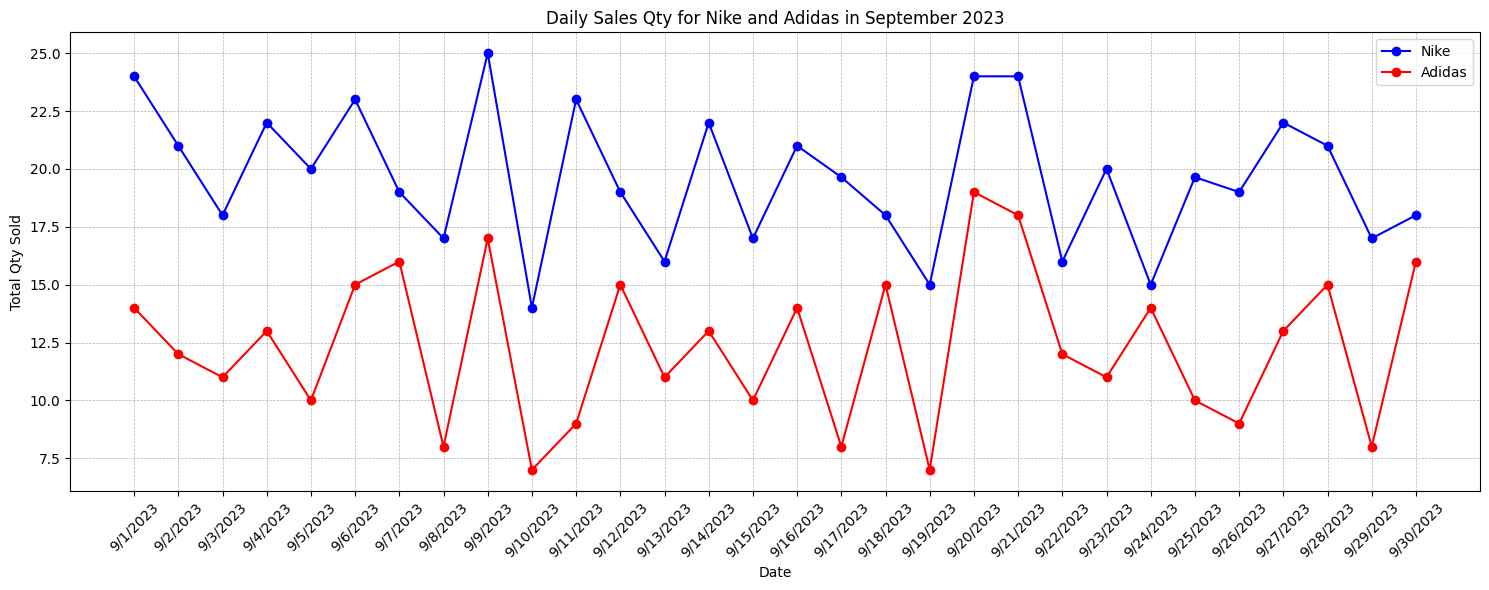

In [101]:
plot_qty()